# Numerical Methods for Ordinary Differential Equations

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by/4.0/80x15.png" /></a><br />This notebook by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

A differential equation is an equation involving derivatives.  In the form
$$ y'(t) = f(t,y(t)),$$
a first-order differential equation expresses the rate of change of a quantity $y$ in terms of the present time and the 
current value of the quantity.  Differential equations are used to model, understand, and predict systems that change with time.

In [6]:
# environment setting, before any codes
import numpy as np
from scipy import integrate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

Solving the initial value problem
\begin{align}
y'(t) & = (1 - 2t)y(t) \\
y(0) & = 1
\end{align}

In [8]:
def ExEuler(yfun, tn, yn, h):
    return yn + h*yfun(tn, yn)

In [9]:
def yfun1(t, y):
    return (1-2*t)*y

In [41]:
def solve_example1(N, T):
    fig = plt.figure()
    
    def ex_fun(t):
        return np.exp(t-t**2)
    
    num = 1000
    t = np.linspace(0,T, num+1)
    plt.plot(t, ex_fun(t), 'b-', lw=2)
    
    # Setting
    t = np.linspace(0, T, N+1)
    dt = np.diff(t)
    y = np.zeros(N+1)
    y[0] = 1
    
    # Explicit Euler Method
    for i in range(N):
        y[i+1] = ExEuler(yfun1, t[i], y[i], dt[i])
        
    # Implicit Euler Method
    #for i in range(N):
    #    y[i+1] = y[i]/(1-(1 - 2*t[i+1])*dt[i])
        
    # Trapezoid Method
    #for i in range(N):
    #    y[i+1] = y[i]*(1 + dt[i]/2*(1 - 2*t[i]))/(1-(1 - 2*t[i+1])*dt[i]/2)
        
    plt.plot(t, y, 'ro', markersize=8)
        
    
    plt.show()

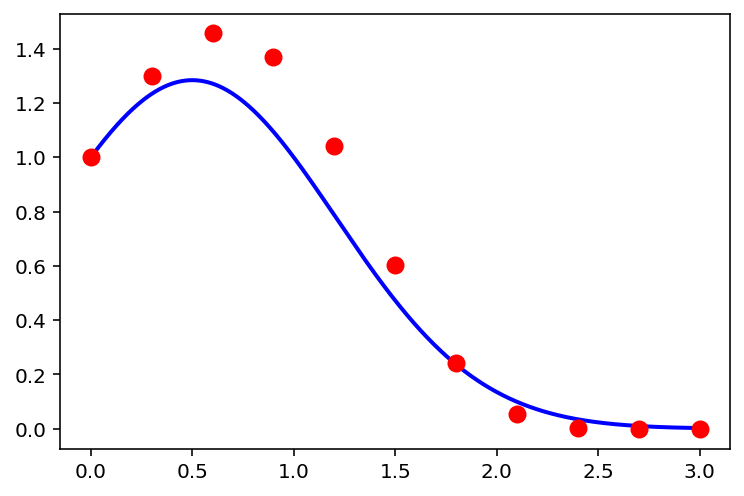

In [42]:
solve_example1(10,3)

In [43]:
w = interactive(solve_example1, N=widgets.IntSlider(min=5,max=40,value=10), T=fixed(5))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=40, min=5), Output()), _dom_classes=('widget-in…

## Lorenz System

Now, we explore the Lorenz system of differential equations:

The Lorenz equations are a simplification of a miniature atmosphere model that he designed to study Rayleigh-Bénard convection, the movement of heat in a fluid, such as air, from a lower warm medium (such as the ground) to a higher cool medium (like the upper atmosphere). In this model of a two-dimensional atmosphere, a circulation of air develops that can be described by the following system of three equations:

\begin{align*}
 x' & = -s x + sy\\
 y' & = -xz + rx - y \\
 z' & = xy - bz
\end{align*}
The variable $x$ denotes the clockwise circulation velocity, $y$ measures the temperature difference between the ascending and descending columns of air, and $z$ measures the deviation from a strictly linear temperature profile in the vertical direction. The Prandtl number $s$, the Rayleigh number $r$, and $b$ are parameters of the system. 

In [1]:
def rk4(yfun, tn, yn, h):
    s1 = yfun(tn, yn)
    s2 = yfun(tn+h/2, yn+h/2*s1)
    s3 = yfun(tn+h/2, yn+h/2*s2)
    s4 = yfun(tn+h, yn + h*s3)
    return yn + h*(s1 + 2*s2 + 2*s3 + s4)/6

In [2]:
def solve_lorenz_rk4(N, T, x0=0, y0=1, z0=1.05, s=10, r=28, b=8/3):
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((0, 50))
    
    def yfun(t, y, s=10, r=28, b=8/3):
        z = np.zeros(3)
        z[0] = -s*y[0] + s*y[1]
        z[1] = -y[0]*y[2] + r*y[0] - y[1]
        z[2] = y[0]*y[1] - b*y[2]
        return z
    
    #y0 = -15 + 30*np.random.random(3)
    y0 = np.array([x0, y0, z0])
    
    t = np.linspace(0, T, N+1)
    dt = np.diff(t)
    
    y = np.zeros([N+1,3])
    y[0] = y0
    
    for i in range(N):
        y[i+1] = rk4(yfun, t[i], y[i], dt[i])
        
    
    s = 10
    c = np.linspace(0,1,N+1)
    for i in range(0,N+1-s,s):
        ax.plot(y[i:i+s+1,0], y[i:i+s+1,1], y[i:i+s+1,2], color=(1,c[i],0), alpha=0.4)
    plt.show()
        

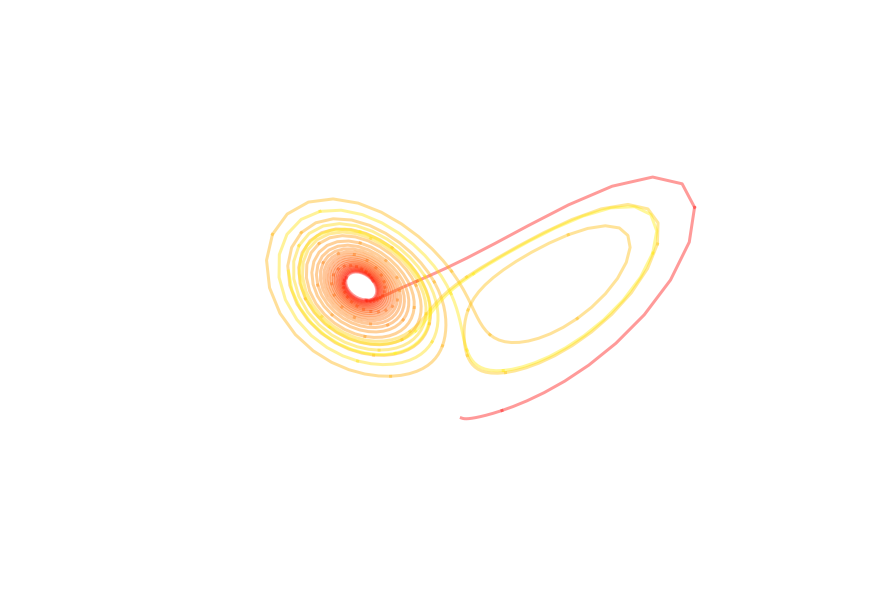

In [62]:
solve_lorenz_rk4(1000, 20)

In [64]:
w = interactive(solve_lorenz_rk4, N=fixed(1000), T=fixed(20), x0=widgets.FloatSlider(min=-10,max=10), y0=widgets.FloatSlider(min=-10,max=10), z0=widgets.FloatSlider(min=-10,max=10))
display(w)

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [42]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(0, )
    plt.show()

    return t, x_t

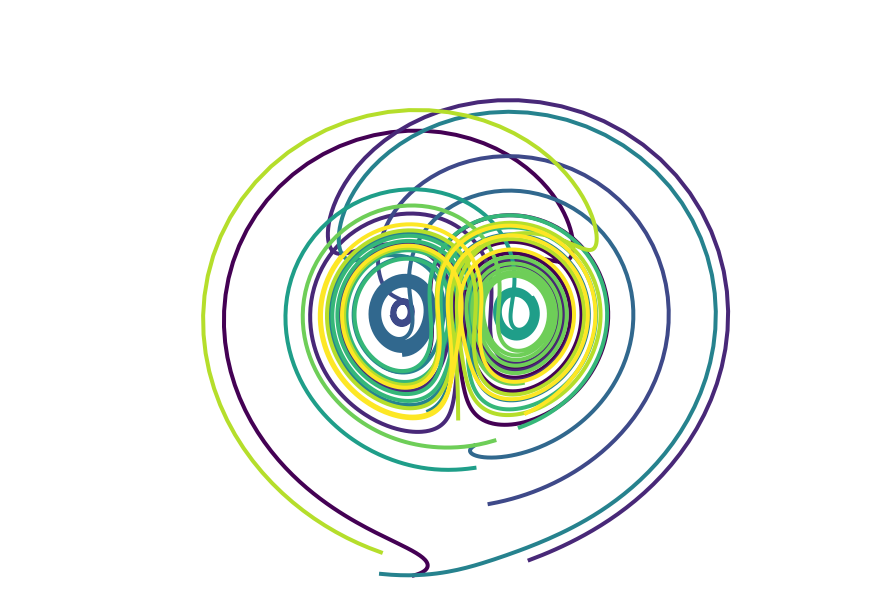

In [14]:
t, x_t = solve_lorenz(angle=180, N=10)